# Gammas test 100 sites

In [ ]:
import numpy as np
import pickle

from mqt.yaqs.core.data_structures.networks import MPO, MPS
from mqt.yaqs.core.data_structures.noise_model import NoiseModel
from mqt.yaqs.core.libraries.gate_library import Z
from mqt.yaqs.core.data_structures.simulation_parameters import Observable, PhysicsSimParams
from mqt.yaqs import simulator

# Initialize simulation parameters

In [ ]:
# Define the system Hamiltonian
L = 100
d = 2
J = 1
g = 0.5
H_0 = MPO()
# H_0.init_Ising(L, d, J, g)
H_0.init_heisenberg(L, J, J, J, g)

# Define the initial state
state = MPS(L, state='wall')

# Define the simulation parameters
dt = 0.1
sample_timesteps = False
N = 100
max_bond_dim = 8
threshold = 1e-6
order = 2
measurements = [Observable(Z(), site) for site in range(L)]
T = 1
gammas = np.logspace(-2, -1, 20)

# Generate TJM data for different Gammas of a noisy 100 sites Heisenberg model

In [ ]:

heatmap = np.empty((L, len(gammas)))
for j, gamma in enumerate(gammas):
    print("Gamma =", gamma)
    # Define the noise model
    noise_model = NoiseModel(['relaxation', 'excitation'], [gamma, gamma])
    sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)

    ########## TJM Example #################
    simulator.run(state, H_0, sim_params, noise_model)
    for i, observable in enumerate(sim_params.observables):
        heatmap[i, j] = observable.results[0]

filename = f"100L_T1_wall_fixed.pickle"
with open(filename, 'wb') as f:
    pickle.dump({
        'heatmap': heatmap,
    }, f)

gammas = np.logspace(-2, -1, 20)
T = 5
heatmap = np.empty((L, len(gammas)))
for j, gamma in enumerate(gammas):
    print("Gamma =", gamma)
    # Define the noise model
    noise_model = NoiseModel(['relaxation', 'excitation'], [gamma, gamma])
    sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)

    ########## TJM Example #################
    simulator.run(state, H_0, sim_params, noise_model)
    for i, observable in enumerate(sim_params.observables):
        heatmap[i, j] = observable.results[0]

filename = f"100L_T5_wall_fixed.pickle"
with open(filename, 'wb') as f:
    pickle.dump({
        'heatmap': heatmap,
    }, f)

T = 10
gammas = np.logspace(-4, 1, 100)
gammas = gammas[55:65]
heatmap = np.empty((L, len(gammas)))
for j, gamma in enumerate(gammas):
    print("Gamma =", gamma)
    # Define the noise model
    noise_model = NoiseModel(['relaxation', 'excitation'], [gamma, gamma])
    sim_params = PhysicsSimParams(measurements, T, dt, N, max_bond_dim, threshold, order, sample_timesteps=sample_timesteps)

    ########## TJM Example #################
    simulator.run(state, H_0, sim_params, noise_model)
    for i, observable in enumerate(sim_params.observables):
        heatmap[i, j] = observable.results[0]

filename = f"100L_T10_wall_fixed.pickle"
with open(filename, 'wb') as f:
    pickle.dump({
        'heatmap': heatmap,
    }, f)

# Plot Data

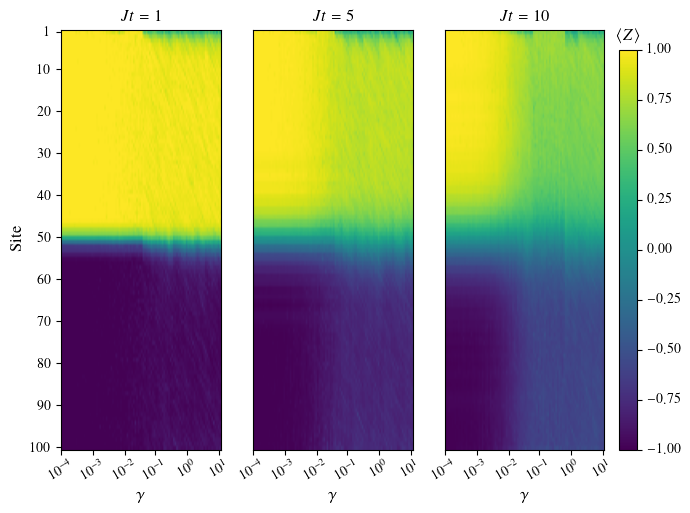

In [1]:
from plotter import plot_gamma_test
plot_gamma_test()